# Module 57: Storytelling with Data

Author: Juliho Castillo Colmenares Ph.D.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with the appropriate encoding due to decoding errors
file_path = "SYB66_153_202310_Gross Value Added by Economic Activity.csv"

data = pd.read_csv(file_path, encoding="ISO-8859-1")
data

,T14,Gross value added by kind of economic activity,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,4,Afghanistan,1995,"Agriculture, hunting, forestry and fishing (% ...",66.3,Data classified according to ISIC Rev. 4.,"United Nations Statistics Division, New York, ..."
2,4,Afghanistan,2005,"Agriculture, hunting, forestry and fishing (% ...",37.3,Data classified according to ISIC Rev. 4.,"United Nations Statistics Division, New York, ..."
3,4,Afghanistan,2010,"Agriculture, hunting, forestry and fishing (% ...",33.2,Data classified according to ISIC Rev. 4.,"United Nations Statistics Division, New York, ..."
4,4,Afghanistan,2015,"Agriculture, hunting, forestry and fishing (% ...",27.3,Data classified according to ISIC Rev. 4.,"United Nations Statistics Division, New York, ..."
...,...,...,...,...,...,...,...
4426,716,Zimbabwe,2010,Services (% of gross value added),65.6,NaN,"United Nations Statistics Division, New York, ..."
4427,716,Zimbabwe,2015,Services (% of gross value added),65.7,NaN,"United Nations Statistics Division, New York, ..."
4428,716,Zimbabwe,2019,Services (% of gross value added),55.7,NaN,"United Nations Statistics Division, New York, ..."
4429,716,Zimbabwe,2020,Services (% of gross value added),56.0,NaN,"United Nations Statistics Division, New York, ..."


In [2]:
# Rename columns to improve readability
data.columns = [
    "Region/Country/Area",
    "Economic Activity",
    "Year",
    "Series",
    "Value",
    "Footnotes",
    "Source",
]

# Remove any rows where the 'Region/Country/Area' or 'Year' is empty or has header-like content
data_cleaned = data.dropna(subset=["Region/Country/Area", "Year"]).reset_index(
    drop=True
)

# Filter out rows where 'Region/Country/Area' is actually "Region/Country/Area" to remove initial header rows
data_cleaned = data_cleaned[
    data_cleaned["Region/Country/Area"] != "Region/Country/Area"
]

# Convert 'Year' and 'Value' columns to numeric, handling errors in conversion to avoid issues with data type
data_cleaned["Year"] = pd.to_numeric(data_cleaned["Year"], errors="coerce")
data_cleaned["Value"] = pd.to_numeric(data_cleaned["Value"], errors="coerce")

# Drop any remaining rows with NaN values in 'Year' or 'Value' after conversion
data_cleaned = data_cleaned.dropna(subset=["Year", "Value"]).reset_index(drop=True)
data_cleaned

,Region/Country/Area,Economic Activity,Year,Series,Value,Footnotes,Source
0,4,Afghanistan,1995,"Agriculture, hunting, forestry and fishing (% ...",66.3,Data classified according to ISIC Rev. 4.,"United Nations Statistics Division, New York, ..."
1,4,Afghanistan,2005,"Agriculture, hunting, forestry and fishing (% ...",37.3,Data classified according to ISIC Rev. 4.,"United Nations Statistics Division, New York, ..."
2,4,Afghanistan,2010,"Agriculture, hunting, forestry and fishing (% ...",33.2,Data classified according to ISIC Rev. 4.,"United Nations Statistics Division, New York, ..."
3,4,Afghanistan,2015,"Agriculture, hunting, forestry and fishing (% ...",27.3,Data classified according to ISIC Rev. 4.,"United Nations Statistics Division, New York, ..."
4,4,Afghanistan,2019,"Agriculture, hunting, forestry and fishing (% ...",27.0,Data classified according to ISIC Rev. 4.;Excl...,"United Nations Statistics Division, New York, ..."
...,...,...,...,...,...,...,...
4425,716,Zimbabwe,2010,Services (% of gross value added),65.6,NaN,"United Nations Statistics Division, New York, ..."
4426,716,Zimbabwe,2015,Services (% of gross value added),65.7,NaN,"United Nations Statistics Division, New York, ..."
4427,716,Zimbabwe,2019,Services (% of gross value added),55.7,NaN,"United Nations Statistics Division, New York, ..."
4428,716,Zimbabwe,2020,Services (% of gross value added),56.0,NaN,"United Nations Statistics Division, New York, ..."


In [3]:
# Filter for Afghanistan and a specific sector (Agriculture, hunting, forestry, and fishing)
afghanistan_data = data_cleaned[
    (data_cleaned["Region/Country/Area"] == "4")
    & (
        data_cleaned["Series"].str.contains(
            "Agriculture, hunting, forestry and fishing"
        )
    )
]
afghanistan_data

,Region/Country/Area,Economic Activity,Year,Series,Value,Footnotes,Source
0,4,Afghanistan,1995,"Agriculture, hunting, forestry and fishing (% ...",66.3,Data classified according to ISIC Rev. 4.,"United Nations Statistics Division, New York, ..."
1,4,Afghanistan,2005,"Agriculture, hunting, forestry and fishing (% ...",37.3,Data classified according to ISIC Rev. 4.,"United Nations Statistics Division, New York, ..."
2,4,Afghanistan,2010,"Agriculture, hunting, forestry and fishing (% ...",33.2,Data classified according to ISIC Rev. 4.,"United Nations Statistics Division, New York, ..."
3,4,Afghanistan,2015,"Agriculture, hunting, forestry and fishing (% ...",27.3,Data classified according to ISIC Rev. 4.,"United Nations Statistics Division, New York, ..."
4,4,Afghanistan,2019,"Agriculture, hunting, forestry and fishing (% ...",27.0,Data classified according to ISIC Rev. 4.;Excl...,"United Nations Statistics Division, New York, ..."
5,4,Afghanistan,2020,"Agriculture, hunting, forestry and fishing (% ...",28.1,Data classified according to ISIC Rev. 4.;Excl...,"United Nations Statistics Division, New York, ..."
6,4,Afghanistan,2021,"Agriculture, hunting, forestry and fishing (% ...",35.0,Data classified according to ISIC Rev. 4.;Excl...,"United Nations Statistics Division, New York, ..."


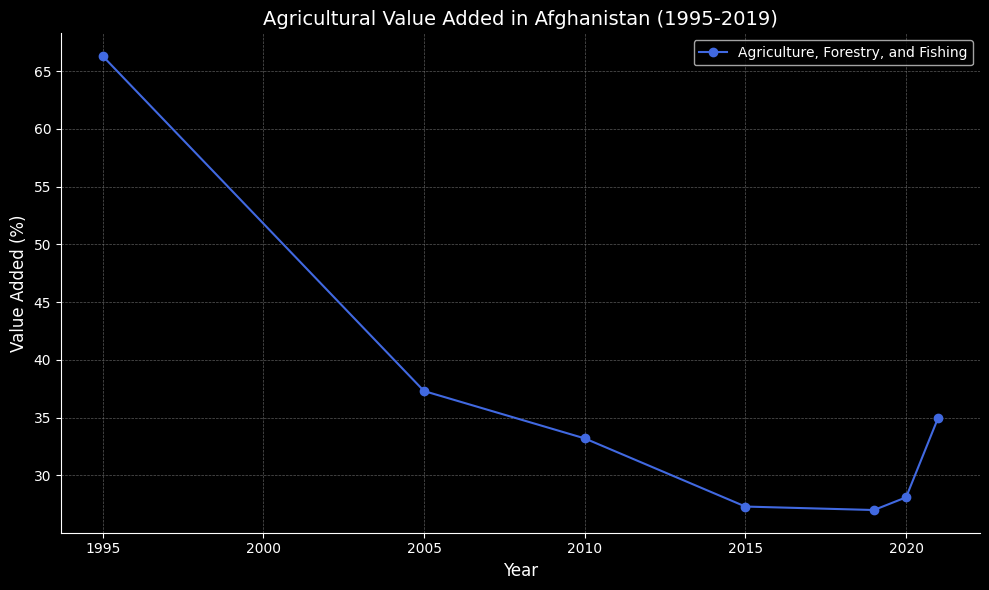

In [4]:
# Set up the figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the data with Tufte's principle of simplicity by reducing grid lines
ax.plot(
    afghanistan_data["Year"],
    afghanistan_data["Value"],
    marker="o",
    linestyle="-",
    color="royalblue",
    label="Agriculture, Forestry, and Fishing",
)

# Gestalt: Grouping elements to indicate continuity in time by using a line plot
# Tufte: Using minimalist axis and labels to focus on data
ax.set_title("Agricultural Value Added in Afghanistan (1995-2019)", fontsize=14)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Value Added (%)", fontsize=12)
ax.grid(True, which="both", linestyle="--", linewidth=0.5, color="gray", alpha=0.7)

# Holmes: Using color and annotations for contrast and clarity without overwhelming color usage
ax.legend()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Final annotations and displaying the plot
plt.tight_layout()
plt.show()